In [29]:
from sklearn import datasets
import numpy as np

iris=datasets.load_iris()
X=iris.data[:,:4]
y=iris.target

idx=np.arange(X.shape[0])
np.random.seed(0)
np.random.shuffle(idx)
X=X[idx]
y=y[idx]

In [30]:
X[:5]

array([[5.8, 2.8, 5.1, 2.4],
       [6. , 2.2, 4. , 1. ],
       [5.5, 4.2, 1.4, 0.2],
       [7.3, 2.9, 6.3, 1.8],
       [5. , 3.4, 1.5, 0.2]])

In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
params={
    'hidden_layer_sizes':[(10,),(10,),(100,),(10,10),(50,50,),(100,100)],
    'activation':['tanh', 'relu'],
    'alpha':[0.0001,0.01],
}
model=MLPClassifier(random_state=0, max_iter=5000)
clf=GridSearchCV(model, param_grid=params,cv=3)
clf.fit(X,y)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=5000, random_state=0),
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.01],
                         'hidden_layer_sizes': [(10,), (10,), (100,), (10, 10),
                                                (50, 50), (100, 100)]})

In [33]:
print(clf.best_score_)
print(clf.best_estimator_)

0.9733333333333333
MLPClassifier(activation='tanh', max_iter=5000, random_state=0)


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [35]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [36]:
def make_numbers(n):
    while n < 6:
        yield n
        n += 1
for i in make_numbers(0):
    print(i)

0
1
2
3
4
5


In [37]:
import sys

a=[i for i in range(100)]
print(sys.getsizeof(a))
b=[i for i in range(1000)]
print(sys.getsizeof(b))
c=(i for i in range(100))
print(sys.getsizeof(c))
d=(i for i in range(1000))
print(sys.getsizeof(d))



904
9016
112
112


In [38]:
import time

def func_sleep(x):
    print('1초 멈춤')
    time.sleep(1)
    return x

items1=[func_sleep(x) for x in range(5)]
items2=(func_sleep(y) for y in range(5))

for i in items1:
    print(i)

1초 멈춤
1초 멈춤
1초 멈춤
1초 멈춤
1초 멈춤
0
1
2
3
4


In [39]:
for i in items2:
    print(i)


1초 멈춤
0
1초 멈춤
1
1초 멈춤
2
1초 멈춤
3
1초 멈춤
4


In [40]:
print('메모리 사용량:',sys.getsizeof(items1)) 
print('메모리 사용량:',sys.getsizeof(items2)) 

메모리 사용량: 120
메모리 사용량: 112


In [41]:
def batch(x1,y1,n):
    x_size=len(x1)
    for idx in range(0, x_size, n):
        yield x1[idx:min(idx + n, x_size)], y1[idx:min(idx + n, x_size)]

In [42]:
clf = MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
beta_2=0.999, early_stopping=False, epsilon=1e-08, hidden_layer_sizes=(100, 100), 
learning_rate='constant', learning_rate_init=0.001, max_fun=15000, max_iter=5000,
momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5, 
random_state=0, shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1, 
verbose=False, warm_start=False)

In [43]:
from sklearn.metrics import accuracy_score
clf.fit(X_train, y_train)

pred=clf.predict(X_test)
print(accuracy_score(y_test, pred))

0.9666666666666667


In [44]:
clf2=MLPClassifier(random_state=0)

points_tr=[]
points_te=[]
samp=batch(X_train,y_train,10)
for idx,(chunk_X,chunk_y) in enumerate(samp):
    print(idx)
    clf2.partial_fit(chunk_X, chunk_y, classes=[0,1,2])
    pred = clf2.predict(X_train)
    point=accuracy_score(y_train, pred)
    points_tr.append(point)
    print('학습용:',point)
    pred = clf2.predict(X_test)
    point=accuracy_score(y_test, pred)
    points_te.append(point)
    print('검증용:',point)
    

0
학습용: 0.48333333333333334
검증용: 0.5
1
학습용: 0.525
검증용: 0.5333333333333333
2
학습용: 0.6416666666666667
검증용: 0.6333333333333333
3
학습용: 0.725
검증용: 0.7
4
학습용: 0.7833333333333333
검증용: 0.7333333333333333
5
학습용: 0.825
검증용: 0.7666666666666667
6
학습용: 0.8416666666666667
검증용: 0.7666666666666667
7
학습용: 0.8333333333333334
검증용: 0.8
8
학습용: 0.85
검증용: 0.8
9
학습용: 0.8583333333333333
검증용: 0.8
10
학습용: 0.8583333333333333
검증용: 0.8
11
학습용: 0.8583333333333333
검증용: 0.8


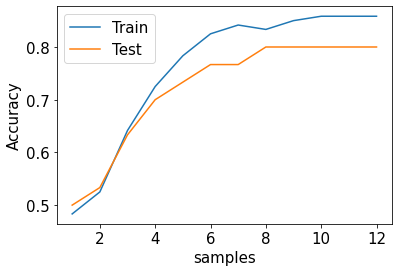

In [45]:
import matplotlib.pyplot as plt
plt.rcParams['font.size']=15
plt.plot(range(1,13),points_tr, label="Train")
plt.plot(range(1,13),points_te, label="Test")
plt.ylabel("Accuracy")
plt.xlabel("samples")
plt.legend()